<div class="alert alert-info">
    <h1 align="center">Linear Regression</h1> 
    <h3 align="center"> Machine Learning Course (Fall 2018)</h3>
    <h5 align="center">Seyed Naser Razavi [ML2018](http://www.snrazavi.ir/ml-2018/)</h5>
</div>

## Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# format plot styles and numbers
plt.style.use('ggplot')
np.set_printoptions(precision=2, threshold=10)

## Read House Price Dataset

<img src='imgs/house_price_dataset.png' width='50%'>

In [2]:
data = np.genfromtxt('data/house_price.txt', delimiter=',')
print(data)

[[2104. 3999.]
 [1600. 3299.]
 [2400. 3690.]
 ...
 [ 852. 1799.]
 [1852. 2999.]
 [1203. 2395.]]


### Inputs and Outputs

In [3]:
X = data[:, 0]  # column 0 from data matrix
print(X.shape)

(41,)


In [4]:
y = data[:, 1]  # column 1 from data matrix
print(y.shape)

(41,)


In [5]:
for xi, yi in zip(X, y):
    print("({:6.1f}, {})".format(xi, yi))

(2104.0, 3999.0)
(1600.0, 3299.0)
(2400.0, 3690.0)
(1416.0, 2320.0)
(1985.0, 2999.0)
(1534.0, 3149.0)
(1427.0, 1989.0)
(1380.0, 2120.0)
(1494.0, 2425.0)
(1940.0, 2399.0)
(2000.0, 3470.0)
(1890.0, 3299.0)
(1268.0, 2599.0)
(2300.0, 4499.0)
(1320.0, 2999.0)
(1236.0, 1999.0)
(2609.0, 4999.0)
(1767.0, 2529.0)
(1888.0, 2550.0)
(1604.0, 2429.0)
(1962.0, 2599.0)
(1100.0, 2499.0)
(1458.0, 4645.0)
(2526.0, 4690.0)
(2200.0, 4750.0)
(2637.0, 2999.0)
(1839.0, 3499.0)
(1000.0, 1699.0)
(2040.0, 3149.0)
(1811.0, 2859.0)
(1437.0, 2499.0)
(1239.0, 2299.0)
(2132.0, 3450.0)
(2162.0, 2870.0)
(1664.0, 3685.0)
(2238.0, 3299.0)
(2567.0, 3140.0)
(1200.0, 2990.0)
( 852.0, 1799.0)
(1852.0, 2999.0)
(1203.0, 2395.0)


## Plot data

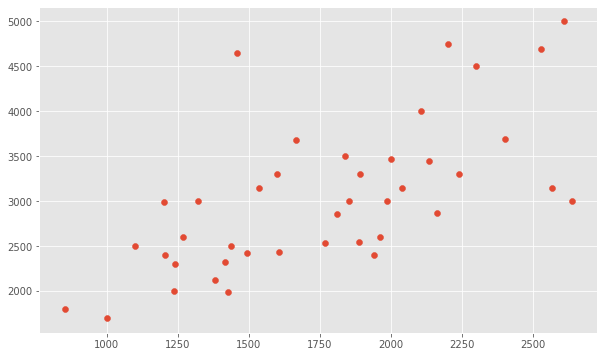

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.show()

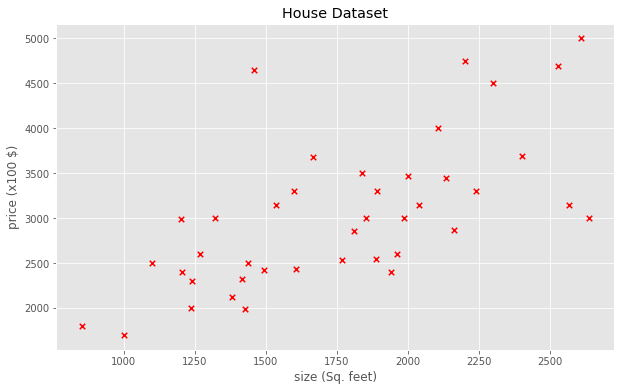

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=30, c='r', marker='x')
plt.xlabel('size (Sq. feet)')
plt.ylabel('price (x100 $)')
plt.title('House Dataset')
plt.show()

## Hypothesis

In [8]:
theta = np.array([[500.], [0.0]])  # h(x) = 500 + 1.5 x

In [9]:
x = np.arange(500, 3000, 100)
print(x)

[ 500  600  700 ... 2700 2800 2900]


In [10]:
print(x.shape)

(25,)


In [11]:
x = x[:, None]  # from 1d to 2d
print(x.shape)

(25, 1)


In [12]:
x = np.concatenate((np.ones_like(x), x), axis=1)  # horizontal concatination
print(x)

[[   1  500]
 [   1  600]
 [   1  700]
 ...
 [   1 2700]
 [   1 2800]
 [   1 2900]]


In [13]:
h = x @ theta

print(h)

[[500.]
 [500.]
 [500.]
 ...
 [500.]
 [500.]
 [500.]]


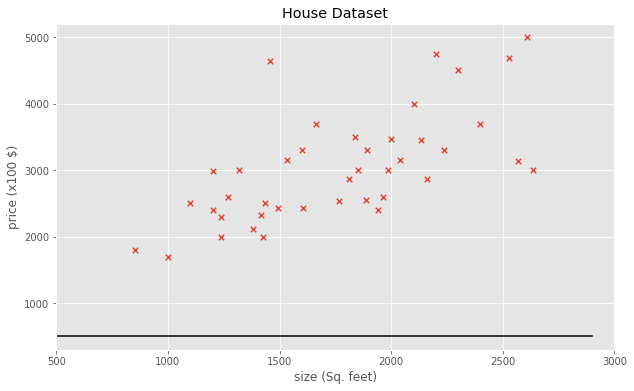

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=30, marker='x')
plt.plot(x, h, 'k')
plt.xlabel('size (Sq. feet)')
plt.ylabel('price (x100 $)')
plt.title('House Dataset')
plt.xlim(500, 3000)
plt.ylim(300, 5200)
plt.show()

## Gradient Descent Demo

In [15]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [16]:
def h(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

def mse(y_pred, y_true):
    return 0.5 * ((y_pred - y_true) ** 2).mean()

In [17]:
x, y = data[:, 0], data[:, 1]

### Normalization

In [18]:
mu = x.mean()
sigma = x.std()
xn = (x - mu) / sigma  # normalization
print(xn)

[ 0.74 -0.35  1.38 ... -1.97  0.19 -1.21]


In [19]:
# learning rate
alpha = 5e-3  

# initialize parameters randomly
theta_0 = np.random.randn() 
theta_1 = np.random.randn()

print("Initial guess:")
print(" theta_0 = %.4f\n theta_1 = %.4f" %(theta_0, theta_1))

costs = []

def update_step():
    global theta_0, theta_1, costs
    
    # predict 
    y_pred = h(theta_0, theta_1, xn)
    costs.append(mse(y_pred, y))
    
    # compute gradients
    dtheta_0 = (y_pred - y)
    dtheta_1 = xn * dtheta_0
    
    # update parameters
    theta_0 -= alpha * dtheta_0.mean()
    theta_1 -= alpha * dtheta_1.mean()

Initial guess:
 theta_0 = 0.9447
 theta_1 = -0.0015


### Animate

In [20]:
fig = plt.figure(dpi=100, figsize=(5, 3))

# plot data
plt.scatter(xn, y, s=30, marker='x')

# plot prediction (a line)
y_pred = h(theta_0, theta_1, xn)
line, = plt.plot(xn, y_pred, 'k')
plt.close()

def animate(i):
    line.set_ydata(h(theta_0, theta_1, xn))
    for i in range(100): update_step()
    return line,

anim = animation.FuncAnimation(fig, animate, np.arange(0, 20), interval=200, repeat_delay=1000)

In [21]:
anim

In [22]:
print(" theta_0 = %7.2f\n theta_1 = %7.2f" %(theta_0, theta_1))

 theta_0 = 3038.31
 theta_1 =  537.90


## Costs

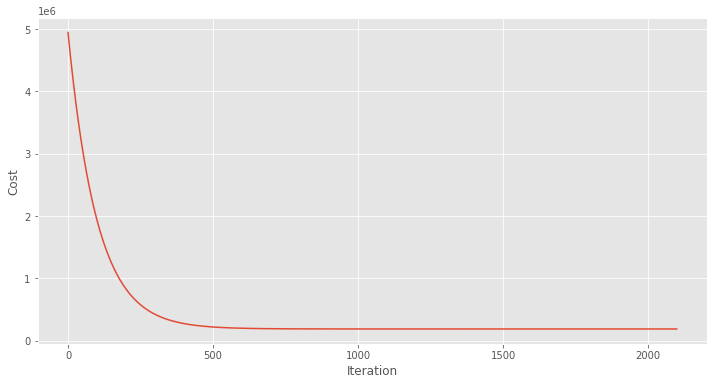

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

## Prediction

In [24]:
x_test = 1750

In [25]:
x_test_n = (x_test - mu) / sigma

In [26]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 3023.25 $
